### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Assignment 2

Provide answers to the problems in the boxes provided.  

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
`Code` boxes take (and execute) `python` code.
`Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

Marks will be awarded for
participation and engagement.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github](https://github.com/gpfeiffer/cs4423) repository.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [1]:
import networkx as nx
import pandas as pd
from queue import Queue
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

## 1.  The Counties of Ireland.

Define a graph `I` on the $32$ counties of Ireland by
joining two counties whenever they have a common border.
(A list of counties and their borders in the adjacency list format
can be found on [github](https://github.com/gpfeiffer/cs4423/blob/master/data/ireland.adj):
check the data and let us know if you disagree!)

What is the order and the size of the resulting graph?

In terms of centrality measures, what are the $3$ most central counties, for
1.  degree centrality?
1.  eigenvector centrality?
1.  closeness centrality?
1.  betweenness centrality?



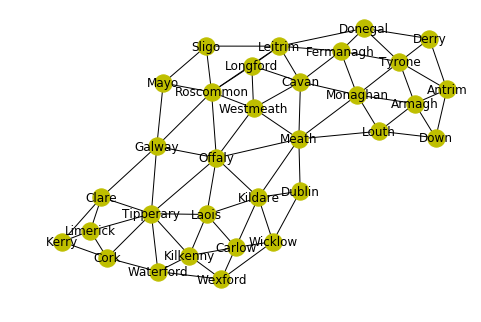

In [43]:
I = nx.read_adjlist("data/ireland.adj")
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(I, **opts)

Order and Size of resulting graph

In [3]:
print("Order: " + str(I.order()))
print("Size: " + str(I.size()))

Order: 32
Size: 76


Assign Node attributes to graph for each centrality measure

In [4]:
nx.set_node_attributes(I, nx.degree_centrality(I), '$C_i^D$')
nx.set_node_attributes(I, nx.eigenvector_centrality(I), '$c_i^E$')
nx.set_node_attributes(I, nx.closeness_centrality(I), '$C_i^C$')
nx.set_node_attributes(I, nx.betweenness_centrality(I), '$C_i^B$')

### Degree Centrality

In [5]:
pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('$C_i^D$', ascending=False).head(3)

,$C_i^D$,$c_i^E$,$C_i^C$,$C_i^B$
Tipperary,0.258065,0.258747,0.397436,0.222681
Roscommon,0.225806,0.266327,0.413333,0.162350
Offaly,0.225806,0.327506,0.469697,0.279330


### Eigenvector Centrality

In [6]:
pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('$c_i^E$', ascending=False).head(3)

,$C_i^D$,$c_i^E$,$C_i^C$,$C_i^B$
Offaly,0.225806,0.327506,0.469697,0.279330
Meath,0.225806,0.289622,0.455882,0.308805
Roscommon,0.225806,0.266327,0.413333,0.162350


### Closeness Centrality

In [7]:
pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('$C_i^C$', ascending=False).head(3)

,$C_i^D$,$c_i^E$,$C_i^C$,$C_i^B$
Offaly,0.225806,0.327506,0.469697,0.279330
Meath,0.225806,0.289622,0.455882,0.308805
Roscommon,0.225806,0.266327,0.413333,0.162350


### Betweenness Centrality

In [8]:
pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('$C_i^B$', ascending=False).head(3)

,$C_i^D$,$c_i^E$,$C_i^C$,$C_i^B$
Meath,0.225806,0.289622,0.455882,0.308805
Offaly,0.225806,0.327506,0.469697,0.279330
Tipperary,0.258065,0.258747,0.397436,0.222681


## 2.  Actions on Sets.

Recall the implementation of **permutations as tuples** ...

In [9]:
n = 4

def transposition(n, i):
    t = [k for k in range(n)]
    t[i], t[i+1] = t[i+1], t[i]
    return tuple(t)

gens = [transposition(n, k) for k in range(n-1)]

... and the **orbit algorithm** that creates the **action graph**:

In [10]:
def init_Q_G(x):
    Q = Queue()
    Q.put(x)
    G = nx.Graph()
    G.add_node(x)
    return Q, G

def action_graph(gens, x, action, equals):
    Q, G = init_Q_G(x)
    while not Q.empty():
        y = Q.get()
        for a in gens:
            z = action(a, y)
            w = next((v for v in G.nodes() if equals(v, z)), None)
            if w is None:
                Q.put(z)
                G.add_node(z)
                G.add_edge(y, z)
            else:
                G.add_edge(y, w)
    return G

Permutations act on subsets of $X = \{0, 1, \dots, n{-}1\}$ in such a way that, for any subset $Z \subseteq X$
and a permutation $f$ of $X$, the image of $Z$ under $f$ is determined as
$$
f(Z) = \{f(z) : z \in Z\},
$$
the image of the set is the set of the images. In `python`, using hashable `frozenset`s rather
than mutable `set`s, this action can be defined as

In [11]:
def on_sets(a, zzz):
    return frozenset(a[z] for z in zzz)

Trusting that equality of (frozen) sets can be tested with `python`'s ordinary equals operator, we again set

In [12]:
def eq(x, y):
    return x == y

Then we can compute and draw the action graph of the symmetric group $S_4$ acting on the 
$2$-subsets of $\{0,1,2,3\}$, using $x = \{0, 1\}$ as the initial vertex:

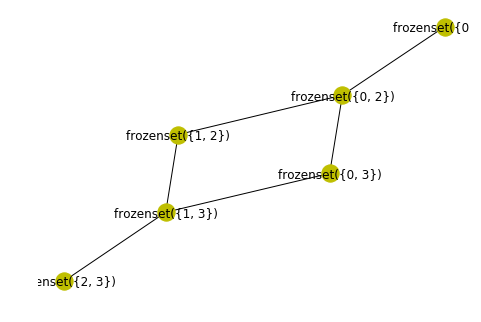

In [13]:
G = action_graph(gens, frozenset({0,1}), on_sets, eq)
nx.draw(G, **opts)

1. Compute and draw the action graph of $S_5$ acting on the $3$-subsets of $\{0,1,2,3,4\}$.
(You would need to define a new list `gens` of generators, and find a suitable $3$-set `x`
to compute the orbit of.  Everything else, the `action_graph` function, the action `on_sets`
and the equality test `eq` should still work.)

2. Compute and draw the action graph of $S_6$ acting on the $3$-subsets of $\{0,1,2,3,4,5\}$.

Define new list of `gens` and find suitable 3-set `x` to compute orbit of:

In [14]:
n = 5
gens = [transposition(n, k) for k in range(n-1)]
x = frozenset({0,1,2}) 

Compute and draw action graph of $S_5$

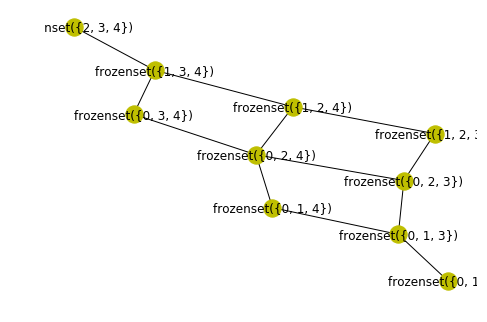

In [15]:
G = action_graph(gens, x, on_sets, eq)
nx.draw(G, **opts)

Compute and draw the action graph of $S_6$

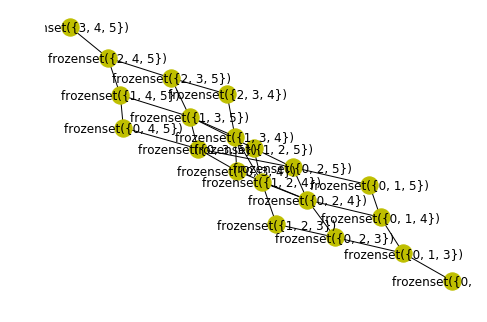

In [16]:
n = 6
gens = [transposition(n, k) for k in range(n-1)]
G = action_graph(gens, x, on_sets, eq)
nx.draw(G, **opts)

## 3. Labelled vs. Unlabelled Trees

According to Cayley's formula, there are $n^{n-2}$ **labelled trees**
on the $n$-point vertex set $X = \{0, 1, 2, \dots, n{-}1\}$.

The **isomorphism types** of trees, aka **unlabelled trees** on $n$ vertices
are much harder to count: there is no closed formula for the number of unlabelled trees.

Using the concept of group actions, we have already determined the
**orbits** of the labelled trees on $4$ nodes under all permutations 
of those $4$ nodes.  As a result we have seen that there are (only) $2$
unlabelled trees on $4$ points, one orbit of length $4$ and one of length $12$,
accounting for a total of $4^{4-2} = 16$ labelled trees.

The same method yields unlabelled trees on more than $4$ points, as follows.
Recall the tools that have been used in the case $n = 4$.

* We have represented permutations on $n$ points as `python` tuples of length $n$,
in particular the transposition swapping points $i$ and $i{+}1$:

In [17]:
def transposition(n, i):
    t = list(range(n))
    t[i], t[i+1] = t[i+1], t[i]
    return tuple(t)

* We have checked equality of graphs by checking whether their node sets and their
edge sets are the same:

In [18]:
def is_subgraph(G, H):
    for x in G:
        if not H.has_node(x):
            return False
    for e in G.edges:
        if not H.has_edge(*e):
            return False
    return True 

def are_equal_as_graphs(G, H):
    return is_subgraph(G, H) and is_subgraph(H, G)

* We have set up a BFS over the implicit action graph
spanned by the action of the symmetric group as an **orbit algorithm**:

In [19]:
def orbit(gens, x, action, equals):
    xxx = [x]
    for y in xxx:
        for a in gens:
            z = action(a, y)
            w = next((v for v in xxx if equals(v, z)), None)
            if w is None:
                xxx.append(z)
    return xxx

* And we have formulated the relabelling of nodes as a group action:

In [20]:
def relabel(a, G):
    mapping = dict(enumerate(a))
    return nx.relabel_nodes(G, mapping)

* Finally, we'll use the [`is_isomorphic`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.isomorphism.is_isomorphic.html) function that `networkx` provides to
test isomorphism of graphs.

With all of this in place, we can systematically list all 
$5^{5-2} = 125$ unlabelled trees on $n = 5$
nodes: 

* Start by setting `n` to $5$, listing the four generating transpositions
of the symmetric group $S_5$ as `swaps`, and initializing a list of `orbits`,
for now as an empty list:

In [21]:
n = 5
swaps = [transposition(n, k) for k in range(n-1)]
orbits = []

* Pick a random tree `t` on $n$ points and draw it:

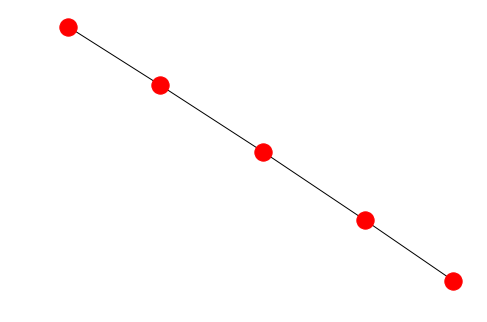

In [22]:
t = nx.random_tree(n)
nx.draw(t)

* Compute the orbit of `t` under the generating permutations `swaps`
  with respect to the `relabel` action, append the orbit to the list `orbits`
  and check its length:

In [23]:
orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

60

* Pick another random tree `t`; in case it is isomorphic to the old tree `t`
  (which now is `orbits[0][0]`) pick again, and keep picking until a tree `t` is
  found that's not isomorphic to the old one; draw `t` - it should have a different shape:

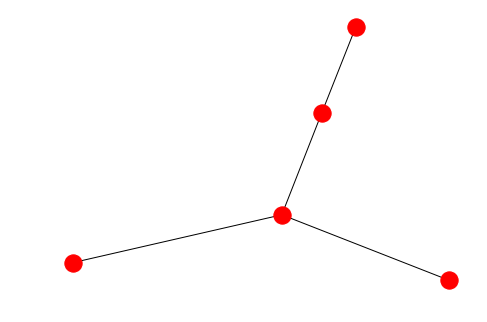

In [24]:
t = nx.random_tree(n)
while nx.is_isomorphic(t, orbits[0][0]):
    t = nx.random_tree(n)

nx.draw(t)

* Compute its orbit and append it to the list `orbits`:

In [25]:
orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

60

* How many labelled trees have we found so far?

In [26]:
sum(len(o) for o in orbits)

120

* That's less than $125$, so we keep searching by repeating the above steps - first
  keep picking random trees until one is found that is not isomorphic to 
  [**any**](https://docs.python.org/3/library/functions.html#any) of the previously found ones (which now are `o[0] for o in orbits`):

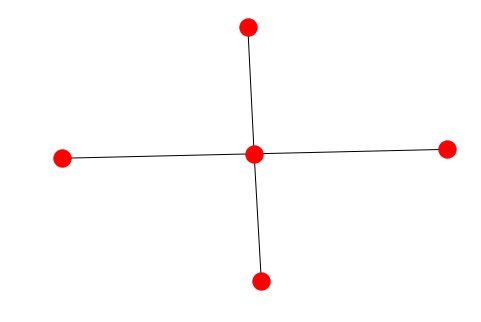

In [27]:
t = nx.random_tree(n)
while any(nx.is_isomorphic(t, o[0]) for o in orbits):
    t = nx.random_tree(n)

nx.draw(t)

* Then append its orbit to the list `orbits`:

In [28]:
orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

5

* Have we found them all?

In [29]:
sum(len(o) for o in orbits)

125

* Yes, all $125$!  So that's $3$ unlabelled trees on $5$ points, 
  with orbits of length $60$, $60$ and $5$.

**How many** unlabelled trees are there $n = 6$ points?  Enumerate the 
**orbits of labelled trees** on $6$ points as above, by following these steps:

1. Start by setting `n` to $6$, `swaps` to the list of $5$ generating transpositions
   of the symmetric group $S_6$, and `orbits` to the empty list.

2. Pick a random tree `t` and draw it.

3. Compute the orbit `orb` of `t` under the generating permutations `swaps`,
   append `orb` to the list `orbits` and check the length of `orb`.

4. Repeat the following steps until the sum of the orbit lengths in `orbits`
   equals $6^{6-2} = 1296$:
   
5. Keep picking random trees on $6$ points until a tree `t` is found that is not isomorphic to any of the previous ones, then draw `t` (is it a new shape?).

6. Compute the orbit `orb` of `t` under the generating permutations `swaps`,
   append `orb` to the list `orbits` and check the length of `orb`.

7. Check the sum of the orbit lengths in `orbit`.  STOP if the desired number is reached.

8. How many unlabelled trees on $6$ points did you find?

9. How big are their **automorphism groups**? (Use the Orbit-Stabilizer Theorem.)

1.Set `n` to 6, generate `swaps`, assign `orbits` to an empty list:

In [30]:
n = 6
swaps = [transposition(n, k) for k in range(n-1)]
orbits = []

2.Pick a random tree `t` on `n` points and draw it.

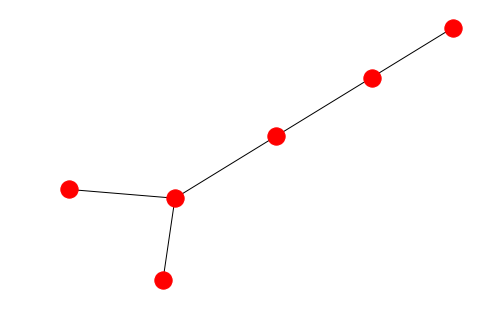

In [31]:
t = nx.random_tree(n)
nx.draw(t)

3.Compute the orbit `orb` of `t` under the generating permutations `swaps` with respect to the relabel action, append the orbit to the list `orbits` and check its length:

In [32]:
orb = orbit(swaps, t, relabel, are_equal_as_graphs)
orbits.append(orb)
len(orb)

360

4.Repeat the following steps until the sum of the orbit lengths in `orbits`
   equals $6^{6-2} = 1296$: <br>
5.Keep picking random trees until tree `t` is found that is not isomorphic to any previous trees:
<b>Note: Shape should be different</b><br>
6.Compute the orbit `orb` of `t` under the generating permutations `swaps`,
   append `orb` to the list `orbits` and check the length of `orb`.<br>
7.Check the sum of the orbit lengths in `orbit`.  STOP if the desired number is reached.

In [33]:
stop = False

interesting_trees = []
automorphism_group_size = []

# Add the first tree from above
interesting_trees += t
automorphism_group_size += [len(orb)]

while (not stop):
    t = nx.random_tree(n)
    while any(nx.is_isomorphic(t, o[0]) for o in orbits):
        t = nx.random_tree(n)
    
    # After loop, store interesting tree to draw later
    interesting_trees += t
    
    # get its orbits and append to our orbits list     
    orb = orbit(swaps, t, relabel, are_equal_as_graphs)
    orbits.append(orb)
    automorphism_group_size += [len(orb)]
    
    # get new total orbits 
    total_orbs = sum(len(o) for o in orbits)
    
    # Check if we have reached our goal (n**(n-2) orbits)    
    if (total_orbs == n**(n-2)): 
        print("STOPPING... Current Orbit Length = " + str(total_orbs))
        stop = True
    else: 
        print("Continueing... Current Orbit Length = " + str(total_orbs))
    
    # exit loop     

print("Finished with:")

print("Automorphism groups of size: ", end=' ')
for group_size in automorphism_group_size:
    print(group_size, end=' ')

Continueing... Current Orbit Length = 720
Continueing... Current Orbit Length = 810
Continueing... Current Orbit Length = 930
Continueing... Current Orbit Length = 1290
STOPPING... Current Orbit Length = 1296
Finished with:
Automorphism groups of size:  360 360 90 120 360 6 

<b>We have found All the trees!</b>

8.How many unlabelled trees on $6$ points did you find?<br>
9.How big are their **automorphism groups**?

In [34]:
num_trees = len(orbits)
print("We found " + str(num_trees) + " unlabelled trees on 6 points with orbits of length: ", end=' ')
for group_size in automorphism_group_size:
    print(group_size, end=', ')

We found 6 unlabelled trees on 6 points with orbits of length:  360, 360, 90, 120, 360, 6, 

## 4. A Collaborations Network

The **social graph** of a node $x$ in a (social) network
is the **induced subgraph** on the set of friends of $x$
(that is the graph which has (only) the friends of $x$
as its vertices, and between them all the edges from the
original network).
The **clustering coefficient** of $x$ is the density
$m \, \binom{n}{2}^{-1}$
of the social graph of $x$, the proportion of its actual number of edges,
$m$, in the set of potential edges, of size $\binom{n}{2} = \frac12 n(n-1)$,
where $n$ is its number of vertices.

[MathSciNet](http://www.ams.org/mathscinet) describes 
the social network of mathematical researchers defined
by collaboration.

1. **Pick** a (local) mathematician with at least $10$
friends (i.e., co-authors), determine their social graph.

2. Hence compute their clustering coefficient.

(**Note** that access to these data is free, but only **on campus**.)


In [35]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import re

Webscrape using Selenium Web Driver to retreive data to build a <b>social graph (network)</b> of mathematical researchers defined by collaboration.

Start with author: <b>Götz Pfeiffer</b>

Web Scrape finished. Taking only 10 co-authors to reduce complexity of graph


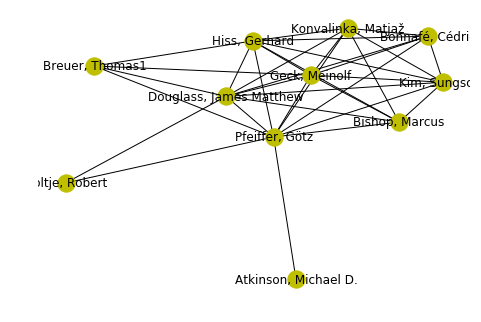

In [36]:
# Launch web driver and go to author page
driver = webdriver.Chrome("/Users/faddlebadiane/chromedriver")
driver.get("https://mathscinet.ams.org/mathscinet/search/authors.html?coauth=328305")
content = driver.page_source

author = "Pfeiffer, Götz"
soup = BeautifulSoup(content)
unfiltered_co_authors = []
co_authors = []
unfiltered_co_authors_to_add =[]
co_authors_to_add = []

# add the first author to co-authors list
unfiltered_co_authors += [author]

# Parse page to find all links (that relate to co-authors)
for a in soup.findAll('a',href=re.compile("./author.html?")):
    unfiltered_co_authors += a
    
# filter each element to make sure it is same type as first link (Assuming first link is good)
co_authors = [co_author for co_author in unfiltered_co_authors if isinstance(co_author, type(unfiltered_co_authors[0])) ]

# Take only 10 co-authors (to reduce complexity of resulting graph)
co_authors = co_authors[:11]

# Special case for breuer, thomas (include subscript)
co_authors[5] = co_authors[5] + "1"

# Create graph and add nodes
G = nx.Graph()
[G.add_node(co_author) for co_author in co_authors]

# Loop for each co-author: find links between co-authors
for co_author in co_authors:
    if(co_author == author): 
        continue #Skip the iteration over first author
        
    link = driver.find_element_by_link_text(co_author)
    link.click()
    content = driver.page_source
    soup = BeautifulSoup(content)

    # Parse page
    for a in soup.findAll('a',href=re.compile("/mathscinet/search/publications.html?")):
        unfiltered_co_authors_to_add += a

    # Only get co-authors which are from the initial list of co-authors
    co_authors_to_add = [co_author_to_add for co_author_to_add in unfiltered_co_authors_to_add if co_author_to_add in co_authors]

    # Add an edge for each co-author in common
    for co_author_to_add in co_authors_to_add:
        G.add_edge(co_author, co_author_to_add)
        
    # To go to next co-author: go back to initial author page first
    driver.back()
    
    # exit loop     

# Finish and close
driver.close()
driver.quit()

opts = { "with_labels": True, "node_color": 'y'}
nx.draw(G, **opts)

print("Web Scrape finished. Taking only 10 co-authors to reduce complexity of graph")

The **clustering coefficient** of $x$ is the density
$m \, \binom{n}{2}^{-1}$
of the social graph of $x$, the proportion of its actual number of edges,
$m$, in the set of potential edges, of size $\binom{n}{2} = \frac12 n(n-1)$,
where $n$ is its number of vertices.


In [37]:
nx.clustering(G)

{'Pfeiffer, Götz': 0.5333333333333333,
 'Atkinson, Michael D.': 0,
 'Bishop, Marcus': 1.0,
 'Boltje, Robert': 1.0,
 'Bonnafé, Cédric': 1.0,
 'Breuer, Thomas1': 1.0,
 'Douglass, James Matthew': 0.6666666666666666,
 'Geck, Meinolf': 0.8214285714285714,
 'Hiss, Gerhard': 0.8214285714285714,
 'Kim, Sungsoon': 0.9523809523809523,
 'Konvalinka, Matjaž': 0.9523809523809523}

In [38]:
print("Average Clusering Coefficient: " + str(nx.average_clustering(G)))

Average Clusering Coefficient: 0.7952380952380952
